# 2.1  The 2D and nD Convolution

# 2.1.1 Using Nested loop

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def linear_convolution(signal, filter_array, output_size):            # here we are performing 2D convolution 
    convolution_output = np.empty(output_size, dtype=float)

    for i in range(output_size[0]):
        for j in range(output_size[1]):
            sum_value = 0.0
            for k in range(max(1, i - filter_array.shape[0] + 1), i + 1):
                for l in range(max(1, j - filter_array.shape[1] + 1), j + 1):
                    if (k < signal.shape[0] and i - k + 1 < filter_array.shape[0] and
                            l < signal.shape[1] and j - l + 1 < filter_array.shape[1]):
                        sum_value += signal[k, l] * filter_array[i - k + 1, j - l + 1]

            convolution_output[i, j] = sum_value

    return convolution_output

def nD_convolution_nested(signal, filter_array, num_dimensions):          # here we are performing nD convolution
    output_size = signal.shape
    convolved_signal = np.empty(output_size, dtype=float)

    for dim in range(1, num_dimensions + 1):                      # it will make a loop which will traverse through the dimensions
        start_time = time.perf_counter()                                          # it will count the start time
        convolved_signal = linear_convolution(signal, filter_array, output_size)
        end_time = time.perf_counter()
        execution_time = end_time - start_time
        print(f"Dimension {dim}: {execution_time} seconds")

    return convolved_signal


signal_size = (100, 100)                                     # Adjust the size as needed
filter_size = (3, 3)                                    # Adjust the filter size as needed
num_dimensions = 25                                     # here we can change this to the desired number of dimensions

execution_times = []
avg_time_nested = []

for dim in range(1, num_dimensions + 1):
    avg_execution_time = 0.0
    for i in range(10):
        signal = np.random.randint(0, 100, size=signal_size)
        filter_array = np.random.randint(0, 3, size=filter_size)
        start_time = time.perf_counter()
        nD_convolution_nested(signal, filter_array, dim)
        end_time = time.perf_counter()
        execution_time = end_time - start_time
        avg_execution_time += execution_time
    avg_execution_time /= 10
    avg_time_nested.append(avg_execution_time)



Dimension 1: 0.13470329996198416 seconds
Dimension 1: 0.10657379997428507 seconds
Dimension 1: 0.11441089992877096 seconds
Dimension 1: 0.11827659991104156 seconds
Dimension 1: 0.11909419996663928 seconds
Dimension 1: 0.12672369997017086 seconds
Dimension 1: 0.1116903000511229 seconds
Dimension 1: 0.11531360005028546 seconds
Dimension 1: 0.12276469997595996 seconds
Dimension 1: 0.11902230000123382 seconds
Dimension 1: 0.11684509995393455 seconds
Dimension 2: 0.11999549996107817 seconds
Dimension 1: 0.1124735000776127 seconds
Dimension 2: 0.12024309998378158 seconds
Dimension 1: 0.11158260004594922 seconds
Dimension 2: 0.1173584999050945 seconds
Dimension 1: 0.1845710000488907 seconds
Dimension 2: 0.10621769994031638 seconds
Dimension 1: 0.11447410006076097 seconds
Dimension 2: 0.13595300004817545 seconds
Dimension 1: 0.148356799967587 seconds
Dimension 2: 0.11215820000506938 seconds
Dimension 1: 0.10422940005082637 seconds
Dimension 2: 0.10966959991492331 seconds
Dimension 1: 0.1214397

# 2.1.2 Using Parallel loops

In [2]:
import concurrent.futures

def linear_convolution(signal, filter_array, output_size, i_range, j_range):  # function performing the 2D convolution.
    convolution_output = np.empty(output_size, dtype=float)

    for i in i_range:
        for j in j_range:
            sum_value = 0.0
            for k in range(max(1, i - filter_array.shape[0] + 1), i + 1):
                for l in range(max(1, j - filter_array.shape[1] + 1), j + 1):
                    if (k < signal.shape[0] and i - k + 1 < filter_array.shape[0] and
                            l < signal.shape[1] and j - l + 1 < filter_array.shape[1]):
                        sum_value += signal[k, l] * filter_array[i - k + 1, j - l + 1]
            convolution_output[i, j] = sum_value

    return convolution_output

def nD_convolution_parallel(signal, filter_array, num_dimensions):
    output_size = signal.shape
    convolved_signal = np.empty(output_size, dtype=float)

    with concurrent.futures.ThreadPoolExecutor() as executor:    # here we have used the necessary library
        for dim in range(1, num_dimensions + 1):
            start_time = time.perf_counter()
            convolved_signal = linear_convolution(signal, filter_array, output_size, range(output_size[0]), range(output_size[1]))
            end_time = time.perf_counter()
            execution_time = end_time - start_time             # here we have calcualted the execution time.
            print(f"Dimension {dim}: {execution_time} seconds")

    return convolved_signal


signal_size = (100, 100)                           # Adjust the size as needed
filter_size = (3, 3)                              # Adjust the filter size as needed
num_dimensions = 25                              # You can change this to the desired number of dimensions

execution_times = []
avg_time_parallel = []

for dim in range(1, num_dimensions + 1):
    avg_execution_time = 0.0
    for i in range(10):
        signal = np.random.randint(0, 100, size=signal_size)       # here we have initiailze the input 
        filter_array = np.random.randint(0, 3, size=filter_size)    # here we have initailize the kernal
        start_time = time.perf_counter()
        nD_convolution_parallel(signal, filter_array, dim)
        end_time = time.perf_counter()
        execution_time = end_time - start_time                   # here we have calcualted the execution time.
        avg_execution_time += execution_time
    avg_execution_time /= 10                           # here we have taken the average time.
    avg_time_parallel.append(avg_execution_time)

Dimension 1: 0.10948610003106296 seconds
Dimension 1: 0.1117655000416562 seconds
Dimension 1: 0.10720399999991059 seconds
Dimension 1: 0.10831649997271597 seconds
Dimension 1: 0.10932889999821782 seconds
Dimension 1: 0.10719099990092218 seconds
Dimension 1: 0.10864849993959069 seconds
Dimension 1: 0.1075688999844715 seconds
Dimension 1: 0.11028000002261251 seconds
Dimension 1: 0.10782169993035495 seconds
Dimension 1: 0.11544750002212822 seconds
Dimension 2: 0.11043860006611794 seconds
Dimension 1: 0.11051469994708896 seconds
Dimension 2: 0.1105121000437066 seconds
Dimension 1: 0.10967800009530038 seconds
Dimension 2: 0.11163759999908507 seconds
Dimension 1: 0.11303460004273802 seconds
Dimension 2: 0.11079460009932518 seconds
Dimension 1: 0.135704500018619 seconds
Dimension 2: 0.11183860001619905 seconds
Dimension 1: 0.10402930004056543 seconds
Dimension 2: 0.11227679997682571 seconds
Dimension 1: 0.1064712000079453 seconds
Dimension 2: 0.11544860003050417 seconds
Dimension 1: 0.1154888

# Plot for Convolution

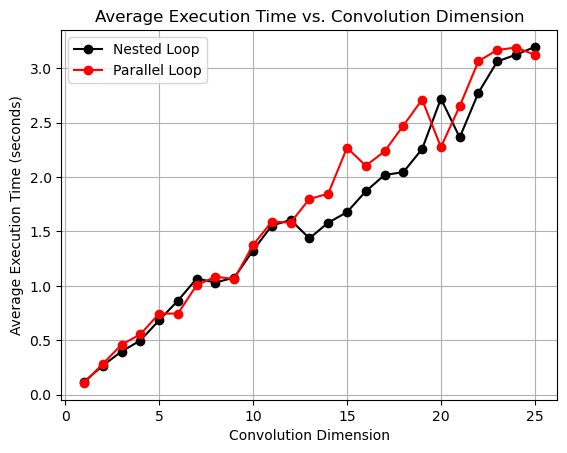

In [3]:
dimensions = list(range(1, num_dimensions + 1))
fig,ax = plt.subplots()
ax.plot(dimensions, avg_time_nested,'ko-', label='Nested Loop')
ax.plot(dimensions, avg_time_parallel,'ro-', label='Parallel Loop')
ax.set_xlabel('Convolution Dimension')
ax.set_ylabel('Average Execution Time (seconds)')
ax.set_title('Average Execution Time vs. Convolution Dimension')
plt.grid(True)
plt.legend()
plt.show()


# 2.2 The 2D and nD DFT

# 2.2.1 Using Nested loops

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

def dft_lin(signal, filter_array, output_size):             # Create an empty array of the specified output size.        
    convolution_output = np.empty(output_size, dtype=float)

    for i in range(output_size[0]):    # Loop over all pixels in the output array.
        for j in range(output_size[1]):
            sum_value = 0.0
            for k in range(max(1, i - filter_array.shape[0] + 1), i + 1):
                for l in range(max(1, j - filter_array.shape[1] + 1), j + 1):
                    if (k < signal.shape[0] and i - k + 1 < filter_array.shape[0] and
                            l < signal.shape[1] and j - l + 1 < filter_array.shape[1]):
                        sum_value += signal[k, l] * filter_array[i - k + 1, j - l + 1]

            convolution_output[i, j] = sum_value             #Store the sum of the convolution in the output array.

    return convolution_output

def perform_multidimensional_convolution(signal, filter_array, num_dimensions):
    output_size = signal.shape
    convolved_signal = np.empty(output_size, dtype=float)

    for dim in range(1, num_dimensions + 1):
        start_time = time.perf_counter()
        convolved_signal = dft_lin(signal, filter_array, output_size)
        end_time = time.perf_counter()
        execution_time = end_time - start_time
        print(f"Dimension {dim}: {execution_time} seconds")

    return convolved_signal

# Example data and filter for testing
signal_size = (100, 100)                                    # Adjust the size as needed
filter_size = (3, 3)                            # Adjust the filter size as needed
num_dimensions = 25                              # You can change this to the desired number of dimensions

execution_times = []
avg_time_nested = []

for dim in range(1, num_dimensions + 1):
    avg_execution_time = 0.0
    for i in range(10):
        signal = np.random.randint(0, 100, size=signal_size)
        filter_array = np.random.randint(0, 3, size=filter_size)
        Dft_filter = np.fft.fftn(filter_array)
        start_time = time.perf_counter()# Start the timer
        perform_multidimensional_convolution(signal,  Dft_filter, dim)
        end_time = time.perf_counter()        #Stop the timer and store the execution time.
        execution_time = end_time - start_time
        avg_execution_time += execution_time
    avg_execution_time /= 10
    avg_time_nested.append(avg_execution_time)


C:\Users\User\AppData\Local\Temp\ipykernel_21124\3649233413.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  convolution_output[i, j] = sum_value


Dimension 1: 0.13555799995083362 seconds
Dimension 1: 0.11398969998117536 seconds
Dimension 1: 0.10977059998549521 seconds
Dimension 1: 0.11307860002852976 seconds
Dimension 1: 0.11213610006961972 seconds
Dimension 1: 0.10514979995787144 seconds
Dimension 1: 0.10568659997079521 seconds
Dimension 1: 0.11033209995366633 seconds
Dimension 1: 0.10907589993439615 seconds
Dimension 1: 0.10835360002238303 seconds
Dimension 1: 0.10563560004811734 seconds
Dimension 2: 0.1058006000239402 seconds
Dimension 1: 0.10982550005428493 seconds
Dimension 2: 0.10404270002618432 seconds
Dimension 1: 0.1130733999889344 seconds
Dimension 2: 0.11020839994307607 seconds
Dimension 1: 0.11549060000106692 seconds
Dimension 2: 0.10407779994420707 seconds
Dimension 1: 0.10839190008118749 seconds
Dimension 2: 0.10604630003217608 seconds
Dimension 1: 0.10487869998905808 seconds
Dimension 2: 0.10661479993723333 seconds
Dimension 1: 0.1041197000304237 seconds
Dimension 2: 0.10708280000835657 seconds
Dimension 1: 0.1054

# 2.2.2 Using parallel loops

In [5]:
import concurrent.futures

def dft_lin(signal, filter_array, output_size, i_range, j_range):
    convolution_output = np.empty(output_size, dtype=float)

    for i in i_range:
        for j in j_range:
            sum_value = 0.0
            for k in range(max(1, i - filter_array.shape[0] + 1), i + 1):
                for l in range(max(1, j - filter_array.shape[1] + 1), j + 1):
                    if (k < signal.shape[0] and i - k + 1 < filter_array.shape[0] and
                            l < signal.shape[1] and j - l + 1 < filter_array.shape[1]):
                        sum_value += signal[k, l] * filter_array[i - k + 1, j - l + 1]

            convolution_output[i, j] = sum_value

    return convolution_output

def nDdimensional_dft_parallel(signal, Dft_filter, num_dimensions):
    output_size = signal.shape
    convolved_signal = np.empty(output_size, dtype=float)         # Create an empty array of the specified output size.

    with concurrent.futures.ThreadPoolExecutor() as executor:     # Create a thread pool executor.
        for dim in range(1, num_dimensions + 1):
            start_time = time.perf_counter()
            convolved_signal = dft_lin(signal, Dft_filter, output_size, range(output_size[0]), range(output_size[1]))
            end_time = time.perf_counter()               # Stop the timer and print the execution time.
            execution_time = end_time - start_time
            print(f"Dimension {dim}: {execution_time} seconds")

    return convolved_signal

# Example data and filter for testing
signal_size = (100, 100)                                   # Adjust the size as needed
filter_size = (3, 3)                                    # Adjust the filter size as needed
num_dimensions = 25                                     # You can change this to the desired number of dimensions

execution_times = []
avg_time_parallel = []

for dim in range(1, num_dimensions + 1):
    avg_execution_time = 0.0
    for i in range(10):
        signal = np.random.randint(0, 100, size=signal_size)
        filter_array = np.random.randint(0, 3, size=filter_size)
        Dft_filter = np.fft.fftn(filter_array)
        start_time = time.perf_counter()
        nDdimensional_dft_parallel(signal, Dft_filter, dim)
        end_time = time.perf_counter()          # Stop the timer and print the execution time.
        execution_time = end_time - start_time
        avg_execution_time += execution_time
    avg_execution_time /= 10
    avg_time_parallel.append(avg_execution_time)

C:\Users\User\AppData\Local\Temp\ipykernel_21124\2836788623.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  convolution_output[i, j] = sum_value


Dimension 1: 0.11806460004299879 seconds
Dimension 1: 0.11430450004991144 seconds
Dimension 1: 0.11723450000863522 seconds
Dimension 1: 0.14935769990552217 seconds
Dimension 1: 0.17012879997491837 seconds
Dimension 1: 0.17055220005568117 seconds
Dimension 1: 0.15844870009459555 seconds
Dimension 1: 0.17688240006100386 seconds
Dimension 1: 0.14333450002595782 seconds
Dimension 1: 0.11761389998719096 seconds
Dimension 1: 0.17933019995689392 seconds
Dimension 2: 0.13507019996177405 seconds
Dimension 1: 0.166500800056383 seconds
Dimension 2: 0.1284985999809578 seconds
Dimension 1: 0.11957890004850924 seconds
Dimension 2: 0.15550170000642538 seconds
Dimension 1: 0.16240310005377978 seconds
Dimension 2: 0.13057329994626343 seconds
Dimension 1: 0.10922890005167574 seconds
Dimension 2: 0.17329170007724315 seconds
Dimension 1: 0.12994829996023327 seconds
Dimension 2: 0.13844550005160272 seconds
Dimension 1: 0.14136449992656708 seconds
Dimension 2: 0.1176814999198541 seconds
Dimension 1: 0.10693

# Plot for DFT

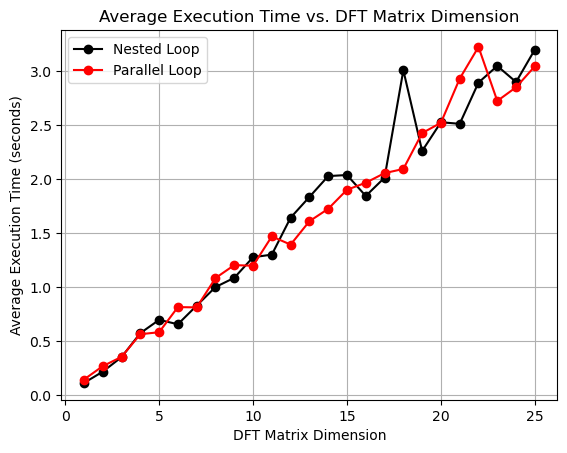

In [6]:
dimensions = list(range(1, num_dimensions + 1))
fig,ax = plt.subplots()
ax.plot(dimensions, avg_time_nested,'ko-', label='Nested Loop')
ax.plot(dimensions, avg_time_parallel,'ro-', label='Parallel Loop')
ax.set_xlabel('DFT Matrix Dimension')
ax.set_ylabel('Average Execution Time (seconds)')
ax.set_title('Average Execution Time vs. DFT Matrix Dimension')
plt.grid(True)
plt.legend()
plt.show()